In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('CustomerData.csv')
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [12]:
df.describe()


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [14]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [18]:
df.drop_duplicates()
# this will show if there is any duplicates or not

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [20]:
# Rename columns
df.rename(columns={'gender': 'Gender','income': 'Income','spending_score': 'Spending_Score','membership_years': 'Membership_Years','purchase_frequency': 'Purchase_Frequency','preferred_category': 'Category','last_purchase_amount': 'Purchase_amount'}, inplace=True)


In [22]:
df.head(1)

,id,age,Gender,Income,Spending_Score,Membership_Years,Purchase_Frequency,Category,Purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53


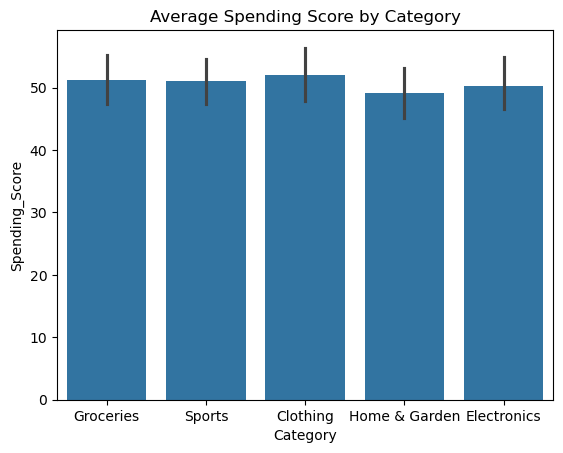

In [28]:
sns.barplot(x='Category', y='Spending_Score', data=df)
plt.title('Average Spending Score by Category')
plt.show()

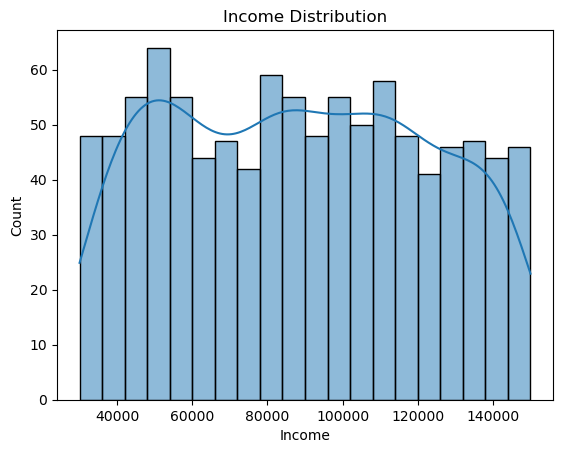

In [30]:
sns.histplot(df['Income'], kde=True, bins=20)
plt.title('Income Distribution')
plt.show()

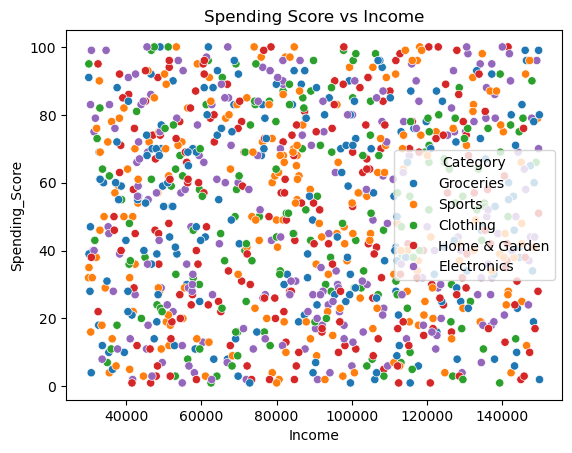

In [34]:
sns.scatterplot(x='Income', y='Spending_Score', hue='Category', data=df)
plt.title('Spending Score vs Income')
plt.show()

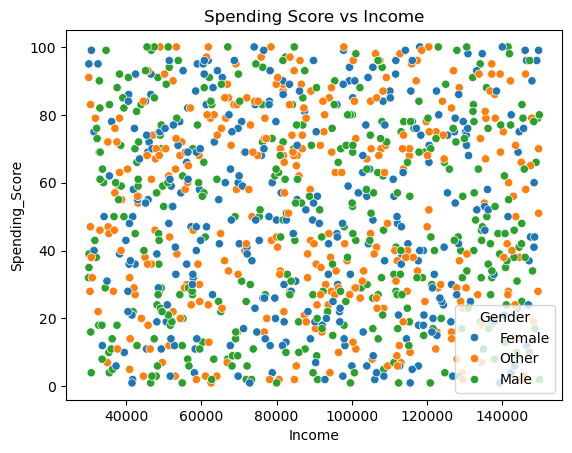

In [68]:
sns.scatterplot(x='Income', y='Spending_Score', hue='Gender', data=df)
plt.title('Spending Score vs Income')
plt.show()

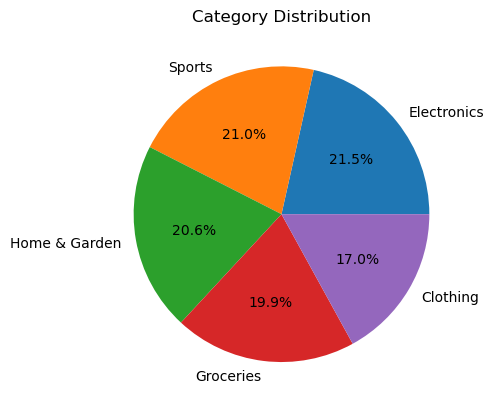

In [74]:
Category_counts = df['Category'].value_counts()
plt.pie(gender_counts, labels=Category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

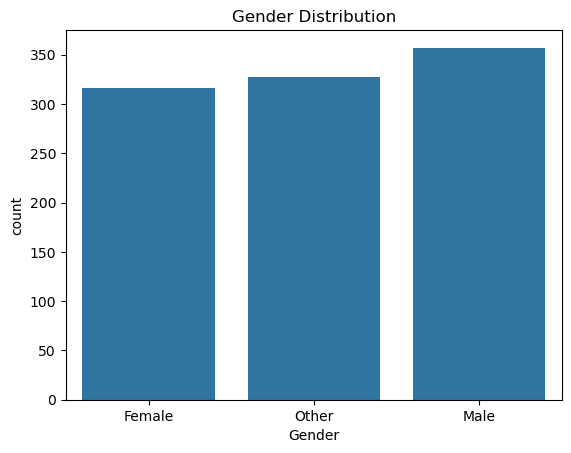

In [38]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

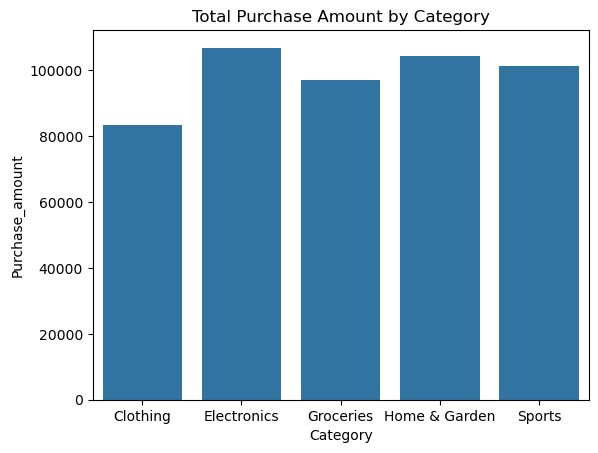

In [80]:
category_totals = df.groupby('Category')['Purchase_amount'].sum().reset_index()
sns.barplot(x='Category', y='Purchase_amount', data=category_totals)
plt.title('Total Purchase Amount by Category')
plt.show()

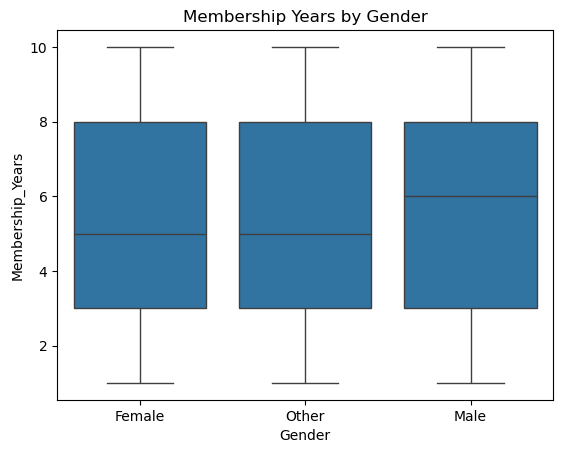

In [50]:
sns.boxplot(x='Gender', y='Membership_Years', data=df)
plt.title('Membership Years by Gender')
plt.show()

<Axes: xlabel='Gender', ylabel='Membership_Years'>

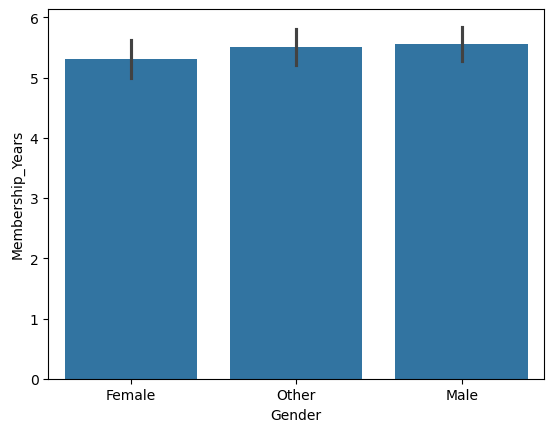

In [86]:
x = df['Gender']
y = df['Membership_Years']
sns.barplot(x=x,y=y,data=df)

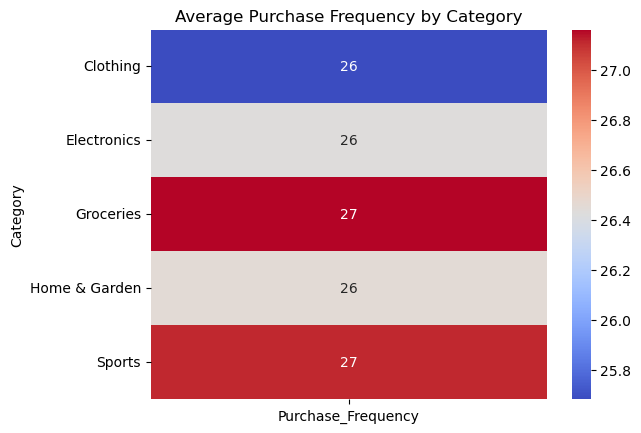

In [54]:
heatmap_data = df.pivot_table(index='Category', values='Purchase_Frequency', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Average Purchase Frequency by Category')
plt.show()


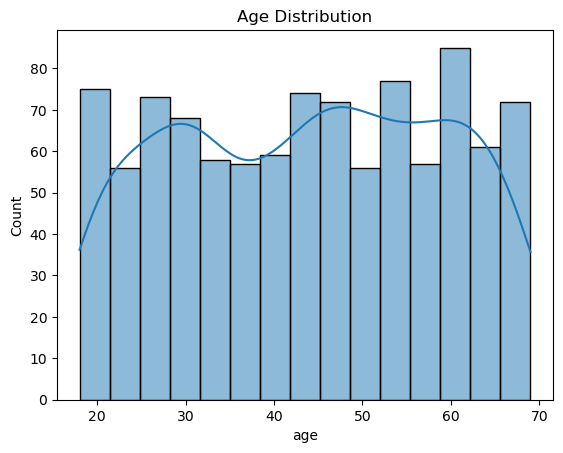

In [58]:
sns.histplot(df['age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.show()


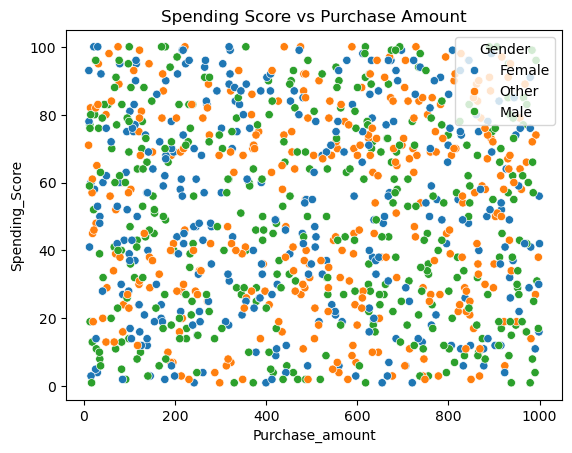

In [62]:
sns.scatterplot(x='Purchase_amount', y='Spending_Score', hue='Gender', data=df)
plt.title('Spending Score vs Purchase Amount')
plt.show()


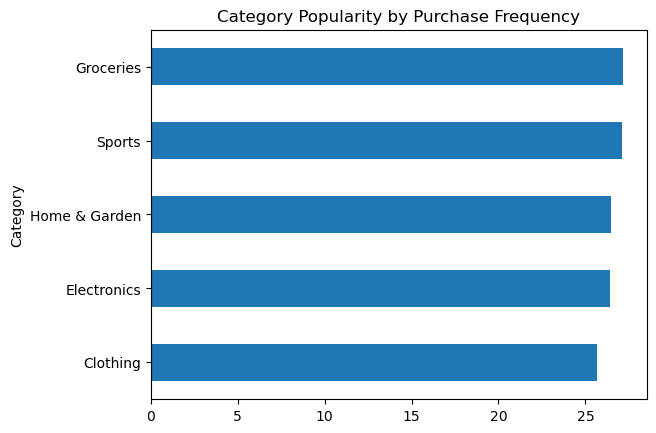

In [66]:
category_popularity = df.groupby('Category')['Purchase_Frequency'].mean().sort_values()
category_popularity.plot(kind='barh', title='Category Popularity by Purchase Frequency')
plt.show()


In [88]:
df.head(5)

,id,age,Gender,Income,Spending_Score,Membership_Years,Purchase_Frequency,Category,Purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


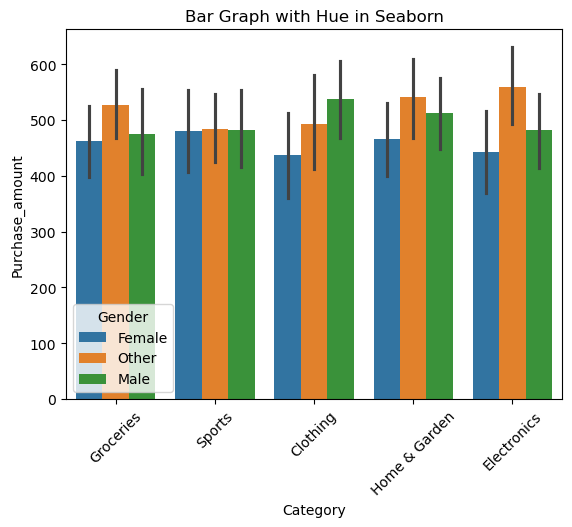

In [ ]:
sns.barplot(x='Category', y='Purchase_amount', hue='Gender', data=df)
plt.title('Bar Graph with Hue in Seaborn')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
